# Modelos supervisados para la racionalización de plazas

## Etapa 1: Analizando la data

- ### Importando librerias

In [90]:
#importamos librerias
import pyreadstat
import pandas as pd
from pyprojroot import here 
#from time import time, ctime
import datetime
#from janitor import clean_names
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import getpass
from pathlib import Path
from janitor import clean_names
from pathlib import Path
import getpass
import os #Este paquete permite crear actividades dependientes del sistema operativo, por ejemplo crear carpetas, conocer sobre un proceso, finalizar un proceso, etc.
import pickle

#Para que las figuras se inserten en el notebook
%matplotlib inline

- ### Cargando y analizando la BD

<ins> Importando datos </ins>

In [91]:
# Para poder correr el script en otras maquinas
user = getpass.getuser() # Capturo el usuario local / Ejemplo "Llan_", este es el nombre de mi usuario que inicie sesion en la pc
user=user.upper()

if    user== "ANALISTAUP29": # PC Analista UP 29 Minedu
      ruta = Path(r"C:\Users\ANALISTAUP29\OneDrive - Ministerio de Educación\MINEDU_2022\RACIO")
elif  user== "LLAN_": # PC casa Llan
      ruta = Path(r"C:\Users\llan_\OneDrive - Ministerio de Educación\MINEDU_2022\RACIO")
#else: user== "ANALISTAUP29": # PC casa Llan
#      ruta = Path(r"C:\Users\ANALISTAUP29\OneDrive - Ministerio de Educación\MINEDU_2022\RACIO")

In [92]:
#user = getpass.getuser()
#print(user)

In [93]:
#print(ruta)

In [94]:
# Cargaremos la base de datos par trabajar:
#########################################
ruta_input=ruta / 'Base_datos\Results'  

data_total = pd.read_csv(ruta_input / 'Base consolidada.csv')
data_train = pd.read_csv(ruta_input / 'df_train.csv')
data_test = pd.read_csv(ruta_input / 'df_test.csv')

C:\Users\ANALISTAUP29\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,122) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [95]:
# Crear carpta "Output"
ruta_output=ruta / 'RacioTeam'  

dir = os.path.join(ruta_output, "Output_2")  #Se unen las rutas, f": Lo usamos para concatenar cadenas y valores

if not os.path.exists(dir):
    os.mkdir(dir)  # Para crear una carpeta de acuerdo a lo especificado por "dir"
    print("Se creó una nueva carpeta")
else:
    print("Ya existe la carpeta")

ruta_output=ruta / 'RacioTeam/Output' 

Ya existe la carpeta


<ins>Unión de bases de datos </ins>

In [96]:
data_train['id_train_test']=1 #Id para base de entrenamiento
data_test['id_train_test']=2 #Id para base de prueba

In [97]:
#Appendiando las bases
data = data_train.append(data_test)

<ins>Exploración inicial de datos</ins>

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160087 entries, 0 to 32017
Data columns (total 96 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            160087 non-null  int64  
 1   dir_n                 160087 non-null  int64  
 2   dir_c                 160087 non-null  int64  
 3   sub_dir_n             160087 non-null  int64  
 4   sub_dir_c             160087 non-null  int64  
 5   doc_aula_n            160087 non-null  int64  
 6   doc_aula_c            160087 non-null  int64  
 7   otro_doc_n            160087 non-null  int64  
 8   otro_doc_c            160087 non-null  int64  
 9   aux_n                 160087 non-null  int64  
 10  aux_c                 160087 non-null  int64  
 11  cant0 (t)             159899 non-null  float64
 12  cant1 (t)             159899 non-null  float64
 13  cant2 (t)             159899 non-null  float64
 14  cant3 (t)             159899 non-null  float64
 15  c

In [99]:
# Exploraremos algunas variables de la base de datos

'''
Podemos notar lo siguiente:

Existe la variable "Unnamed" que es un "ID" que se eliminara, no sirve para el analisis.
Existen variables que se deberian transfirmar en dicotomicas: Frontera, bilingue, etc.
Existen valores perdidos "NaN", esto se procedera a analizar a continuación.
'''

data.head()


,Unnamed: 0,dir_n,dir_c,sub_dir_n,sub_dir_c,doc_aula_n,doc_aula_c,otro_doc_n,otro_doc_c,aux_n,...,ruralidad,vraem,frontera,bilingue,caracteristica,d_prov,d_dreugel,secciones_necesarias,kfold,id_train_test
0,0,1,0,0,0,9,3,0,2,0,...,Urbano,No Vraem,No frontera,No bilingue,Completo,TRUJILLO,UGEL 02 - LA ESPERANZA,12,4.0,1
1,1,0,0,0,0,1,0,0,0,0,...,Rural 1,Vraem,No frontera,No bilingue,Unidocente,TAYACAJA,UGEL TAYACAJA,1,3.0,1
2,2,0,0,0,0,0,1,0,0,0,...,Rural 1,No Vraem,No frontera,No bilingue,Unidocente,AIJA,UGEL AIJA,1,3.0,1
3,3,0,0,0,0,1,0,0,0,0,...,Rural 3,No Vraem,Frontera,No bilingue,Unidocente,PUNO,UGEL PUNO,1,4.0,1
4,4,0,0,0,0,1,0,0,0,0,...,Rural 3,No Vraem,No frontera,Bilingue,Unidocente,HUARI,UGEL HUARI,1,3.0,1


In [100]:
# Renombrando las variables:

In [101]:
# Estamos analizando el tipo de variable que contiene la BD, luego de renombrar
data=clean_names(data)
data.info("cod_mod")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160087 entries, 0 to 32017
Data columns (total 96 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   unnamed_0             160087 non-null  int64  
 1   dir_n                 160087 non-null  int64  
 2   dir_c                 160087 non-null  int64  
 3   sub_dir_n             160087 non-null  int64  
 4   sub_dir_c             160087 non-null  int64  
 5   doc_aula_n            160087 non-null  int64  
 6   doc_aula_c            160087 non-null  int64  
 7   otro_doc_n            160087 non-null  int64  
 8   otro_doc_c            160087 non-null  int64  
 9   aux_n                 160087 non-null  int64  
 10  aux_c                 160087 non-null  int64  
 11  cant0_t_              159899 non-null  float64
 12  cant1_t_              159899 non-null  float64
 13  cant2_t_              159899 non-null  float64
 14  cant3_t_              159899 non-null  float64
 15  c

In [102]:
# Para el año actual
for i in range(7):
    data.rename(columns={f'cant{i}_t_':f'cant{i}_t_0'},inplace=True)
    data.rename(columns={f'inclu{i}_t_':f'inclu{i}_t_0'},inplace=True)

In [103]:
# Para los años anteriores
for i in range(1,5):
    for j in range(7):
        data.rename(columns={f'cant{j}_t_{i}_':f'cant{j}_t_{i}'},inplace=True)
        data.rename(columns={f'inclu{j}_t_{i}_':f'inclu{j}_t_{i}'},inplace=True)

In [104]:
# Estamos analizando el tipo de variable que contiene la BD, luego de renombrar
data.info("cod_mod")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160087 entries, 0 to 32017
Data columns (total 96 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   unnamed_0             160087 non-null  int64  
 1   dir_n                 160087 non-null  int64  
 2   dir_c                 160087 non-null  int64  
 3   sub_dir_n             160087 non-null  int64  
 4   sub_dir_c             160087 non-null  int64  
 5   doc_aula_n            160087 non-null  int64  
 6   doc_aula_c            160087 non-null  int64  
 7   otro_doc_n            160087 non-null  int64  
 8   otro_doc_c            160087 non-null  int64  
 9   aux_n                 160087 non-null  int64  
 10  aux_c                 160087 non-null  int64  
 11  cant0_t_0             159899 non-null  float64
 12  cant1_t_0             159899 non-null  float64
 13  cant2_t_0             159899 non-null  float64
 14  cant3_t_0             159899 non-null  float64
 15  c

<ins> Diccionario de datos</ins>

https://1drv.ms/u/s!AodhAFTTDqU00U8a53GPrtoVbxtH?e=cvotnC


<ins> Consideraciónes </ins>

- Solo consideramos II.EE Públicas ya sea de gestión directa o privada (gestion=1 o gestion=2)
- Con II.EE del "Sector Educación"
- Estado "Activo"


<ins> Algunos datos importantes </ins>

In [105]:
# Viendo la cantidad de alumnos regulares segun nivel modular en el año actual
data2=data[["cant0_t_0","cant1_t_0","cant2_t_0","cant3_t_0","cant4_t_0","cant5_t_0","cant6_t_0","d_niv_mod"]].groupby(by=['d_niv_mod'],as_index=False).sum()
data2

,d_niv_mod,cant0_t_0,cant1_t_0,cant2_t_0,cant3_t_0,cant4_t_0,cant5_t_0,cant6_t_0
0,Inicial - Cuna-jardin,20797.0,46706.0,62661.0,73313.0,23527.0,23387.0,0.0
1,Inicial - Jardin,0.0,588956.0,712703.0,1038104.0,343676.0,360017.0,1.0
2,Primaria,0.0,1280959.0,1356961.0,1366468.0,1352741.0,1340070.0,1288402.0


In [106]:
# Viendo la cantidad de alumnos inclusivos segun nivel modular en el año actual
data2=data[["inclu0_t_0","inclu1_t_0","inclu2_t_0","inclu3_t_0","inclu4_t_0","inclu5_t_0","inclu6_t_0","d_niv_mod"]].groupby(by=['d_niv_mod'],as_index=False).sum()
data2

,d_niv_mod,inclu0_t_0,inclu1_t_0,inclu2_t_0,inclu3_t_0,inclu4_t_0,inclu5_t_0,inclu6_t_0
0,Inicial - Cuna-jardin,10.0,87.0,137.0,235.0,0.0,0.0,0.0
1,Inicial - Jardin,0.0,781.0,1283.0,2253.0,0.0,0.0,0.0
2,Primaria,0.0,3492.0,5555.0,8594.0,11203.0,13289.0,14325.0


<ins> Identificando valores perdidos o NaN </ins>

<AxesSubplot:>

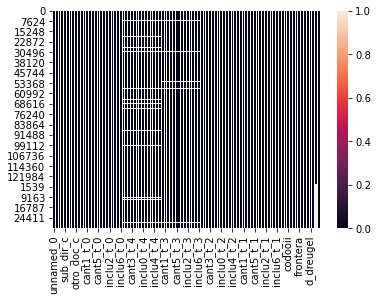

In [107]:
# Análisis de "NAN"
#data_cod_mod=data[["cod_mod","ubigeo","d_dpto","d_prov","d_dist","codooii","niv_mod","d_niv_mod","d_gestion","ruralidad"]]
sns.heatmap(data.isnull())

In [108]:
# Capturare el nombre de las variables de la base de datos.
# Para realizar un bucle que me indique el numero de valores perdidos de cada variable de la base de datos.
columns_names = data.columns.values  
columns_names_list = list(columns_names)

In [109]:
#columns_names_list

In [110]:
# Contando la cantidad de NaN: el siguiente bucle indica: "cantidad de NaN/Cantidad total de datos/Porcentaje de NaN/Tipo de variable"

i=0
for j in columns_names_list:
    data_nan=data[columns_names_list[i]].isnull().sum().sum()
    data_count=data[columns_names_list[i]].count()
    data_total=data_nan+data_count
    data_type=data[columns_names_list[i]].dtypes
    data_nan_pct=str("{0:.2f}%".format((data_nan/data_total)*100))
    
    if data_nan>0:
        print (f"{columns_names_list[i]} ---> NaN/Total/%NaN/Type: {data_nan} / {data_total} / {data_nan_pct} / {data_type}")
        
    i=i+1


cant0_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
cant1_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
cant2_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
cant3_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
cant4_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
cant5_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
cant6_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
inclu0_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
inclu1_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
inclu2_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
inclu3_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
inclu4_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
inclu5_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
inclu6_t_0 ---> NaN/Total/%NaN/Type: 188 / 160087 / 0.12% / float64
cant0_t_4 ---> NaN/Total/%NaN/Type: 5229 / 160087 / 3.2

In [111]:
# analizando la cantidad de alumnos en los casos con missings
'''
analisis_nan=data[["cod_mod","niv_mod","d_niv_mod","year","doc_aula_n","doc_aula_c","otro_doc_n","otro_doc_c","aux_n","aux_c",
"doc_aula_req","aux_req","fisica_req","aip_req","doc_aula_exd_n","doc_aula_exd_c","otro_doc_exd","aux_exd","bolsa_sira",
"secciones_necesarias","ruralidad","vraem","frontera","bilingue","caracteristica",
"cant0_t_0"  ,"cant0_t_1" ,"cant0_t_2"  ,"cant0_t_3" ,"cant0_t_4",  
"cant1_t_0"  ,"cant1_t_1" ,"cant1_t_2"  ,"cant1_t_3" ,"cant1_t_4", 
"cant2_t_0"  ,"cant2_t_1" ,"cant2_t_2"  ,"cant2_t_3" ,"cant2_t_4",  
"cant3_t_0"  ,"cant3_t_1" ,"cant3_t_2"  ,"cant3_t_3" ,"cant3_t_4",  
"cant4_t_0"  ,"cant4_t_1" ,"cant4_t_2"  ,"cant4_t_3" ,"cant4_t_4",  
"cant5_t_0"  ,"cant5_t_1" ,"cant5_t_2"  ,"cant5_t_3" ,"cant5_t_4",
"cant6_t_0"  ,"cant6_t_1" ,"cant6_t_2"  ,"cant6_t_3" ,"cant6_t_4" ]].groupby(by=["cod_mod","niv_mod","year"],as_index=False).sum()
'''

'\nanalisis_nan=data[["cod_mod","niv_mod","d_niv_mod","year","doc_aula_n","doc_aula_c","otro_doc_n","otro_doc_c","aux_n","aux_c",\n"doc_aula_req","aux_req","fisica_req","aip_req","doc_aula_exd_n","doc_aula_exd_c","otro_doc_exd","aux_exd","bolsa_sira",\n"secciones_necesarias","ruralidad","vraem","frontera","bilingue","caracteristica",\n"cant0_t_0"  ,"cant0_t_1" ,"cant0_t_2"  ,"cant0_t_3" ,"cant0_t_4",  \n"cant1_t_0"  ,"cant1_t_1" ,"cant1_t_2"  ,"cant1_t_3" ,"cant1_t_4", \n"cant2_t_0"  ,"cant2_t_1" ,"cant2_t_2"  ,"cant2_t_3" ,"cant2_t_4",  \n"cant3_t_0"  ,"cant3_t_1" ,"cant3_t_2"  ,"cant3_t_3" ,"cant3_t_4",  \n"cant4_t_0"  ,"cant4_t_1" ,"cant4_t_2"  ,"cant4_t_3" ,"cant4_t_4",  \n"cant5_t_0"  ,"cant5_t_1" ,"cant5_t_2"  ,"cant5_t_3" ,"cant5_t_4",\n"cant6_t_0"  ,"cant6_t_1" ,"cant6_t_2"  ,"cant6_t_3" ,"cant6_t_4" ]].groupby(by=["cod_mod","niv_mod","year"],as_index=False).sum()\n'

In [112]:
# Exportamos para analizar
#analisis_nan.to_excel(ruta_output / 'Base_analisis.xlsx', sheet_name='Base' , index= False)

<ins> Definición de variables para el modelo: primer mapeo </ins>

In [113]:
# Primeras variables que podrian considerar en el modelado:
'''
# ID: 
-------
# cod_mod
# year

# Variable Y: 
---------------
# secciones_necesarias: secciones necesarias estimadas.

# Variable X: 
---------------
# doc_aula_n: Docente de aula nombrado
# doc_aula_c: Docente d aula contratado 
# otro_doc_n: Otros docente nombrado
# otro_doc_c: Otros docente contratados

# aux_n: Auxiliar nombrado
# aux_c: Auxiliar contratado

# doc_aula_req: docente de aula - requerimiento
# aux_req: auxiliar - requerimiento
# fisica_req: docente de educacion fisica - requerimiento
# aip_req: docente AIP - requerimiento

# doc_aula_exd_n: docente de aula nombrado- excedente
# doc_aula_exd_c: docente de aula contratado- excedente
# aux_exd

# otro_doc_exd: otro docente - excedente

# bolsa_sira: bolsa de horas registrada en sira (resultado del proceso)

# ruralidad: gradiente de ruralidad del servicio educativo
# vraem: servicio educativo localizado en el valle del rio ene-mantaro
# frontera: servicio educativo ubicado en la frontera
# bilingue: caracteristica del servicio educativo (unidocente,multigrado o polidocente)
# caracteristica

# Nivel inicial:   
T=t         T=t-1     T=t-2    T=t-3     T=t-4  
cant0_t_0  cant0_t_1 cant0_t_2  cant0_t_3 cant0_t_4  
cant1_t_0  cant1_t_1 cant1_t_2  cant1_t_3 cant1_t_4  
cant2_t_0  cant2_t_1 cant2_t_2  cant2_t_3 cant2_t_4  
cant3_t_0  cant3_t_1 cant3_t_2  cant3_t_3 cant3_t_4  
cant4_t_0  cant4_t_1 cant4_t_2  cant4_t_3 cant4_t_4  
cant5_t_0  cant5_t_1 cant5_t_2  cant5_t_3 cant5_t_4  

# Nivel primaria:   
T=t         T=t-1     T=t-2    T=t-3     T=t-4  
cant1_t_0  cant1_t_1 cant1_t_2  cant1_t_3 cant1_t_4  
cant2_t_0  cant2_t_1 cant2_t_2  cant2_t_3 cant2_t_4  
cant3_t_0  cant3_t_1 cant3_t_2  cant3_t_3 cant3_t_4  
cant4_t_0  cant4_t_1 cant4_t_2  cant4_t_3 cant4_t_4  
cant5_t_0  cant5_t_1 cant5_t_2  cant5_t_3 cant5_t_4  
cant6_t_0  cant6_t_1 cant6_t_2  cant6_t_3 cant6_t_4  

# Nivel secundaria:   
T=t         T=t-1     T=t-2    T=t-3     T=t-4  
cant1_t_0  cant1_t_1 cant1_t_2  cant1_t_3 cant1_t_4  
cant2_t_0  cant2_t_1 cant2_t_2  cant2_t_3 cant2_t_4  
cant3_t_0  cant3_t_1 cant3_t_2  cant3_t_3 cant3_t_4  
cant4_t_0  cant4_t_1 cant4_t_2  cant4_t_3 cant4_t_4  
cant5_t_0  cant5_t_1 cant5_t_2  cant5_t_3 cant5_t_4 

'''

#Seleccionado las variables para la clusterización:

variables_clusters=["id_train_test","d_niv_mod","doc_aula_n","doc_aula_c","otro_doc_n","otro_doc_c","aux_n","aux_c",
"secciones_necesarias","ruralidad","vraem","frontera","bilingue","caracteristica",
"cant0_t_0"  ,"cant0_t_1" ,"cant0_t_2"  ,"cant0_t_3" ,"cant0_t_4",  
"cant1_t_0"  ,"cant1_t_1" ,"cant1_t_2"  ,"cant1_t_3" ,"cant1_t_4", 
"cant2_t_0"  ,"cant2_t_1" ,"cant2_t_2"  ,"cant2_t_3" ,"cant2_t_4",  
"cant3_t_0"  ,"cant3_t_1" ,"cant3_t_2"  ,"cant3_t_3" ,"cant3_t_4",  
"cant4_t_0"  ,"cant4_t_1" ,"cant4_t_2"  ,"cant4_t_3" ,"cant4_t_4",  
"cant5_t_0"  ,"cant5_t_1" ,"cant5_t_2"  ,"cant5_t_3" ,"cant5_t_4",
"cant6_t_0"  ,"cant6_t_1" ,"cant6_t_2"  ,"cant6_t_3" ,"cant6_t_4",
"inclu0_t_0"  ,"inclu0_t_1" ,"inclu0_t_2"  ,"inclu0_t_3" ,"inclu0_t_4",  
"inclu1_t_0"  ,"inclu1_t_1" ,"inclu1_t_2"  ,"inclu1_t_3" ,"inclu1_t_4", 
"inclu2_t_0"  ,"inclu2_t_1" ,"inclu2_t_2"  ,"inclu2_t_3" ,"inclu2_t_4",  
"inclu3_t_0"  ,"inclu3_t_1" ,"inclu3_t_2"  ,"inclu3_t_3" ,"inclu3_t_4",  
"inclu4_t_0"  ,"inclu4_t_1" ,"inclu4_t_2"  ,"inclu4_t_3" ,"inclu4_t_4",  
"inclu5_t_0"  ,"inclu5_t_1" ,"inclu5_t_2"  ,"inclu5_t_3" ,"inclu5_t_4",
"inclu6_t_0"  ,"inclu6_t_1" ,"inclu6_t_2"  ,"inclu6_t_3" ,"inclu6_t_4"]

In [114]:
# Generando la variable de variación de la cantidad de alumnos

In [115]:
#variables_clusters

In [116]:
# Nos quedamos con la data que analizaremos
data_clusters=data.copy()
data_clusters

,unnamed_0,dir_n,dir_c,sub_dir_n,sub_dir_c,doc_aula_n,doc_aula_c,otro_doc_n,otro_doc_c,aux_n,...,ruralidad,vraem,frontera,bilingue,caracteristica,d_prov,d_dreugel,secciones_necesarias,kfold,id_train_test
0,0,1,0,0,0,9,3,0,2,0,...,Urbano,No Vraem,No frontera,No bilingue,Completo,TRUJILLO,UGEL 02 - LA ESPERANZA,12,4.0,1
1,1,0,0,0,0,1,0,0,0,0,...,Rural 1,Vraem,No frontera,No bilingue,Unidocente,TAYACAJA,UGEL TAYACAJA,1,3.0,1
2,2,0,0,0,0,0,1,0,0,0,...,Rural 1,No Vraem,No frontera,No bilingue,Unidocente,AIJA,UGEL AIJA,1,3.0,1
3,3,0,0,0,0,1,0,0,0,0,...,Rural 3,No Vraem,Frontera,No bilingue,Unidocente,PUNO,UGEL PUNO,1,4.0,1
4,4,0,0,0,0,1,0,0,0,0,...,Rural 3,No Vraem,No frontera,Bilingue,Unidocente,HUARI,UGEL HUARI,1,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,32013,0,0,0,0,3,0,0,0,0,...,Rural 2,No Vraem,No frontera,No bilingue,Multigrado,LIMA,UGEL 04 COMAS,3,NaN,2
32014,32014,0,0,0,0,3,0,0,0,0,...,Rural 2,No Vraem,No frontera,No bilingue,Multigrado,CHANCHAMAYO,UGEL CHANCHAMAYO,3,NaN,2
32015,32015,0,0,0,0,1,0,0,0,0,...,Rural 1,No Vraem,No frontera,No bilingue,Unidocente,HUAMALIES,UGEL LEONCIO PRADO,1,NaN,2
32016,32016,1,0,0,0,1,0,0,0,0,...,Rural 3,No Vraem,No frontera,No bilingue,Multigrado,PALPA,UGEL PALPA,2,NaN,2


In [117]:
#Borramos la variabl que no interesa
#del data_clusters['unnamed_0']

In [118]:
# Guardo la base para poder usarla en un futuro.
#data_clusters.to_pickle(ruta_output / "bd_total.pkl")

In [119]:
data_clusters=data[variables_clusters]
data_clusters

,id_train_test,d_niv_mod,doc_aula_n,doc_aula_c,otro_doc_n,otro_doc_c,aux_n,aux_c,secciones_necesarias,ruralidad,...,inclu5_t_0,inclu5_t_1,inclu5_t_2,inclu5_t_3,inclu5_t_4,inclu6_t_0,inclu6_t_1,inclu6_t_2,inclu6_t_3,inclu6_t_4
0,1,Primaria,9,3,0,2,0,0,12,Urbano,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Primaria,1,0,0,0,0,0,1,Rural 1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Inicial - Jardin,0,1,0,0,0,0,1,Rural 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Inicial - Jardin,1,0,0,0,0,0,1,Rural 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Primaria,1,0,0,0,0,0,1,Rural 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,2,Primaria,3,0,0,0,0,0,3,Rural 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32014,2,Primaria,3,0,0,0,0,0,3,Rural 2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
32015,2,Inicial - Jardin,1,0,0,0,0,0,1,Rural 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32016,2,Primaria,1,0,0,0,0,0,2,Rural 3,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0


<ins> Analisis previo para seleccionar las variables </ins>

- ### Análisis de correlación de variables

<ins> Transformaciones iniciales</ins>

In [120]:
# Algunos estadisticos de las variables:
data_clusters.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
id_train_test,160087.00,1.20,0.40,1.00,1.00,1.00,1.00,2.00
doc_aula_n,160087.00,2.33,4.47,0.00,0.00,1.00,2.00,66.00
doc_aula_c,160087.00,1.06,1.48,0.00,0.00,1.00,1.00,27.00
otro_doc_n,160087.00,0.06,0.34,0.00,0.00,0.00,0.00,7.00
otro_doc_c,160087.00,0.13,0.48,0.00,0.00,0.00,0.00,8.00
...,...,...,...,...,...,...,...,...
inclu6_t_0,159899.00,0.09,0.48,0.00,0.00,0.00,0.00,22.00
inclu6_t_1,159298.00,0.13,0.55,0.00,0.00,0.00,0.00,20.00
inclu6_t_2,158779.00,0.12,0.53,0.00,0.00,0.00,0.00,18.00
inclu6_t_3,157425.00,0.11,0.52,0.00,0.00,0.00,0.00,18.00


In [121]:
# Dicotomizar variables:

# Ente las variables a dicotomizar tenemos las siguientes:

'''
vraem: 
0: No Vraem
1: Vraem

ruralidad:
1: Rural 1
2: Rural 2
3: Rural 3

frontera:

Frontera
0: No frontera
1: bilingue

caracteristica
1: Completo
2: Multigrado
3: Unidocente
'''

# Dicotomizar ruralidad:
dummies=pd.get_dummies(data_clusters["ruralidad"], drop_first = True )
data_clusters= pd.concat([data_clusters, dummies], axis = 1)
data_clusters = data_clusters.drop(columns=['ruralidad'])

# Dicotomizar vraem:
dummies=pd.get_dummies(data_clusters["vraem"], drop_first = True )
data_clusters= pd.concat([data_clusters, dummies], axis = 1)
data_clusters = data_clusters.drop(columns=['vraem'])

# Dicotomizar frontera:
dummies=pd.get_dummies(data_clusters["frontera"], drop_first = True )
data_clusters= pd.concat([data_clusters, dummies], axis = 1)
data_clusters = data_clusters.drop(columns=['frontera'])

# Dicotomizar caracteristica
dummies=pd.get_dummies(data_clusters["caracteristica"], drop_first = True )
data_clusters= pd.concat([data_clusters, dummies], axis = 1)
data_clusters = data_clusters.drop(columns=['caracteristica'])

# Dicotomizar bilingue
dummies=pd.get_dummies(data_clusters["bilingue"], drop_first = True )
data_clusters= pd.concat([data_clusters, dummies], axis = 1)
data_clusters = data_clusters.drop(columns=['bilingue'])


In [122]:
# Normalizando el nombre de las nuevas variables damizadas
data_clusters=clean_names(data_clusters)
columns_names = data_clusters.columns.values  
columns_names_list = list(columns_names)
columns_names_list

['id_train_test',
 'd_niv_mod',
 'doc_aula_n',
 'doc_aula_c',
 'otro_doc_n',
 'otro_doc_c',
 'aux_n',
 'aux_c',
 'secciones_necesarias',
 'cant0_t_0',
 'cant0_t_1',
 'cant0_t_2',
 'cant0_t_3',
 'cant0_t_4',
 'cant1_t_0',
 'cant1_t_1',
 'cant1_t_2',
 'cant1_t_3',
 'cant1_t_4',
 'cant2_t_0',
 'cant2_t_1',
 'cant2_t_2',
 'cant2_t_3',
 'cant2_t_4',
 'cant3_t_0',
 'cant3_t_1',
 'cant3_t_2',
 'cant3_t_3',
 'cant3_t_4',
 'cant4_t_0',
 'cant4_t_1',
 'cant4_t_2',
 'cant4_t_3',
 'cant4_t_4',
 'cant5_t_0',
 'cant5_t_1',
 'cant5_t_2',
 'cant5_t_3',
 'cant5_t_4',
 'cant6_t_0',
 'cant6_t_1',
 'cant6_t_2',
 'cant6_t_3',
 'cant6_t_4',
 'inclu0_t_0',
 'inclu0_t_1',
 'inclu0_t_2',
 'inclu0_t_3',
 'inclu0_t_4',
 'inclu1_t_0',
 'inclu1_t_1',
 'inclu1_t_2',
 'inclu1_t_3',
 'inclu1_t_4',
 'inclu2_t_0',
 'inclu2_t_1',
 'inclu2_t_2',
 'inclu2_t_3',
 'inclu2_t_4',
 'inclu3_t_0',
 'inclu3_t_1',
 'inclu3_t_2',
 'inclu3_t_3',
 'inclu3_t_4',
 'inclu4_t_0',
 'inclu4_t_1',
 'inclu4_t_2',
 'inclu4_t_3',
 'inclu4_t_4'

<ins> Tasa de crecimiento anual de estudiantes </ins>

In [123]:
# Importante!!! ---> Remplazando los missings por cero en el caso de cantidad de alumnos regulares e inclusivos: Esto se acordo con Hugo
for j in range(7):
    for i in range(5):
        data_clusters.loc[data_clusters[f"cant{j}_t_{i}"].isnull(),f"cant{j}_t_{i}"]=0
        
for j in range(7):
    for i in range(5):
        data_clusters.loc[data_clusters[f"inclu{j}_t_{i}"].isnull(),f"inclu{j}_t_{i}"]=0       

In [124]:
# Nombre de las variables

columns_names_a = data_clusters.columns.values  
columns_names_a_list = list(columns_names_a)

#Primaria
#columns_names_b = data_primaria.columns.values  
#columns_names_b_list = list(columns_names_b)

#Secundaria
#columns_names_f = data_secundaria.columns.values  
#columns_names_f_list = list(columns_names_f)

i=0
for j in columns_names_a_list:
    data_nan=data_clusters[columns_names_a_list[i]].isnull().sum().sum()
    data_count=data_clusters[columns_names_a_list[i]].count()
    data_total=data_nan+data_count
    data_type=data_clusters[columns_names_a_list[i]].dtypes
    data_nan_pct=str("{0:.2f}%".format((data_nan/data_total)*100))
    
    if data_nan>0:
        print (f"{columns_names_a_list[i]} ---> NaN/Total/%NaN/Type: {data_nan} / {data_total} / {data_nan_pct} / {data_type}")
    i=i+1

In [125]:
# total de alumnos regulares por año
for i in range(5):
    data_clusters[f"cant_t_{i}"]=data_clusters[f"cant0_t_{i}"]+data_clusters[f"cant1_t_{i}"]+data_clusters[f"cant2_t_{i}"]+data_clusters[f"cant3_t_{i}"]+data_clusters[f"cant4_t_{i}"]+data_clusters[f"cant5_t_{i}"]+data_clusters[f"cant6_t_{i}"]

In [126]:
# total de alumnos inclusivos por año
for i in range(5):
    data_clusters[f"inclu_t_{i}"]=data_clusters[f"inclu0_t_{i}"]+data_clusters[f"inclu1_t_{i}"]+data_clusters[f"inclu2_t_{i}"]+data_clusters[f"inclu3_t_{i}"]+data_clusters[f"inclu4_t_{i}"]+data_clusters[f"inclu5_t_{i}"]+data_clusters[f"inclu6_t_{i}"]

In [127]:
# total de alumnos regulares por año
data_clusters["cant_total"]=0
for i in range(5):
    data_clusters["cant_total"]=data_clusters["cant_total"]+ data_clusters[f"cant_t_{i}"]

In [128]:
# total de alumnos inclusivos por año
data_clusters["inclu_total"]=0
for i in range(5):
    data_clusters["inclu_total"]=data_clusters["inclu_total"]+ data_clusters[f"inclu_t_{i}"]

In [129]:
data_clusters

,id_train_test,d_niv_mod,doc_aula_n,doc_aula_c,otro_doc_n,otro_doc_c,aux_n,aux_c,secciones_necesarias,cant0_t_0,...,cant_t_2,cant_t_3,cant_t_4,inclu_t_0,inclu_t_1,inclu_t_2,inclu_t_3,inclu_t_4,cant_total,inclu_total
0,1,Primaria,9,3,0,2,0,0,12,0.0,...,265.0,236.0,218.0,0.0,0.0,0.0,0.0,0.0,1451.0,0.0
1,1,Primaria,1,0,0,0,0,0,1,0.0,...,10.0,11.0,13.0,0.0,1.0,1.0,1.0,1.0,45.0,4.0
2,1,Inicial - Jardin,0,1,0,0,0,0,1,0.0,...,10.0,15.0,11.0,0.0,0.0,0.0,0.0,2.0,55.0,2.0
3,1,Inicial - Jardin,1,0,0,0,0,0,1,0.0,...,8.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0
4,1,Primaria,1,0,0,0,0,0,1,0.0,...,2.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,13.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,2,Primaria,3,0,0,0,0,0,3,0.0,...,36.0,35.0,38.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0
32014,2,Primaria,3,0,0,0,0,0,3,0.0,...,35.0,39.0,35.0,1.0,1.0,1.0,1.0,2.0,172.0,6.0
32015,2,Inicial - Jardin,1,0,0,0,0,0,1,0.0,...,6.0,6.0,5.0,0.0,1.0,1.0,1.0,0.0,30.0,3.0
32016,2,Primaria,1,0,0,0,0,0,2,0.0,...,27.0,28.0,31.0,0.0,0.0,1.0,3.0,1.0,132.0,5.0


In [130]:
# Info
data_clusters.groupby(['d_niv_mod']).size()

d_niv_mod
Inicial - Cuna-jardin     1261
Inicial - Jardin         71487
Primaria                 87339
dtype: int64

In [131]:
data_clusters["inclu_total"]

0        0.0
1        4.0
2        2.0
3        0.0
4        4.0
        ... 
32013    0.0
32014    6.0
32015    3.0
32016    5.0
32017    0.0
Name: inclu_total, Length: 160087, dtype: float64

In [132]:
#ID inicial
data_clusters.loc[(data_clusters.d_niv_mod=="Inicial - Cuna-jardin") | (data_clusters.d_niv_mod=="Inicial - Jardin") , 'id_niv_modular']=0

In [133]:
#ID primaria
data_clusters.loc[(data_clusters.d_niv_mod=="Primaria"), 'id_niv_modular']=1

In [134]:
data_clusters.groupby(['id_niv_modular']).size()

id_niv_modular
0.0    72748
1.0    87339
dtype: int64

In [135]:
# Tasa de crecimiento anual (4 años) alumnos regulares
#data_clusters["tasa_c_anual"]=0
#data_clusters.loc[(data_clusters.inclu_t_4>0), 'tasa_c_anual'] =((data_clusters["cant_t_0"]/data_clusters["cant_t_4"])**(1/4))-1  
#data_clusters.loc[(data_clusters.inclu_t_3>0) & (data_clusters.inclu_t_4==0), 'tasa_c_anual'] =((data_clusters["cant_t_0"]/data_clusters["cant_t_3"])**(1/3))-1  
#data_clusters.loc[(data_clusters.inclu_t_2>0) & ((data_clusters.inclu_t_3==0) & (data_clusters.inclu_t_4==0)), 'tasa_c_anual'] =((data_clusters["cant_t_0"]/data_clusters["cant_t_2"])**(1/2))-1  
#data_clusters.loc[(data_clusters.inclu_t_1>0) & ((data_clusters.inclu_t_2==0) & (data_clusters.inclu_t_3==0) & (data_clusters.inclu_t_4==0)), 'tasa_c_anual'] =((data_clusters["cant_t_0"]/data_clusters["cant_t_1"])**(1/1))-1
#data_clusters.loc[((data_clusters.inclu_t_1==0) & (data_clusters.inclu_t_2==0) & (data_clusters.inclu_t_3==0) & (data_clusters.inclu_t_4==0)), 'tasa_c_anual'] =0

In [136]:
# Tasa de crecimiento anual (4 años) alumnos inclusivos
#data_clusters["tasa_c_inclu_anual"]=0
#data_clusters.loc[(data_clusters.inclu_t_4>0), 'tasa_c_inclu_anual'] =((data_clusters["inclu_t_0"]/data_clusters["inclu_t_4"])**(1/4))-1  
#data_clusters.loc[(data_clusters.inclu_t_3>0) & (data_clusters.inclu_t_4==0), 'tasa_c_inclu_anual'] =((data_clusters["inclu_t_0"]/data_clusters["inclu_t_3"])**(1/3))-1  
#data_clusters.loc[(data_clusters.inclu_t_2>0) & ((data_clusters.inclu_t_3==0) & (data_clusters.inclu_t_4==0)), 'tasa_c_inclu_anual'] =((data_clusters["inclu_t_0"]/data_clusters["inclu_t_2"])**(1/2))-1  
#data_clusters.loc[(data_clusters.inclu_t_1>0) & ((data_clusters.inclu_t_2==0) & (data_clusters.inclu_t_3==0) & (data_clusters.inclu_t_4==0)), 'tasa_c_inclu_anual'] =((data_clusters["inclu_t_0"]/data_clusters["inclu_t_1"])**(1/1))-1
#data_clusters.loc[((data_clusters.inclu_t_1==0) & (data_clusters.inclu_t_2==0) & (data_clusters.inclu_t_3==0) & (data_clusters.inclu_t_4==0)), 'tasa_c_inclu_anual'] =0

In [137]:
# Importante!!! --->Remplazando valores nulos en las tasas, asumimos que son cero. Revisar este supuesto
#data_clusters.loc[data_clusters["tasa_c_anual"].isnull(),"tasa_c_anual"]=0
#data_clusters.loc[data_clusters["tasa_c_inclu_anual"].isnull(),"tasa_c_inclu_anual"]=0

In [138]:
# Nombre de las variables

#Inicial
#columns_names_a = data_clusters.columns.values  
#columns_names_a_list = list(columns_names_a)

#Primaria
#columns_names_b = data_primaria.columns.values  
#columns_names_b_list = list(columns_names_b)

#Secundaria
#columns_names_f = data_secundaria.columns.values  
#columns_names_f_list = list(columns_names_f)

In [139]:
# Para inicial
'''
i=0
for j in columns_names_a_list:
    data_nan=data_clusters[columns_names_a_list[i]].isnull().sum().sum()
    data_count=data_clusters[columns_names_a_list[i]].count()
    data_total=data_nan+data_count
    data_type=data_clusters[columns_names_a_list[i]].dtypes
    data_nan_pct=str("{0:.2f}%".format((data_nan/data_total)*100))
    
    if data_nan>0:
        print (f"{columns_names_a_list[i]} ---> NaN/Total/%NaN/Type: {data_nan} / {data_total} / {data_nan_pct} / {data_type}")
        
    i=i+1
'''

'\ni=0\nfor j in columns_names_a_list:\n    data_nan=data_clusters[columns_names_a_list[i]].isnull().sum().sum()\n    data_count=data_clusters[columns_names_a_list[i]].count()\n    data_total=data_nan+data_count\n    data_type=data_clusters[columns_names_a_list[i]].dtypes\n    data_nan_pct=str("{0:.2f}%".format((data_nan/data_total)*100))\n    \n    if data_nan>0:\n        print (f"{columns_names_a_list[i]} ---> NaN/Total/%NaN/Type: {data_nan} / {data_total} / {data_nan_pct} / {data_type}")\n        \n    i=i+1\n'

In [140]:
#data_clusters.to_excel(ruta_output / 'Analisis2.xlsx', sheet_name='Analisis')

<ins> Correlación </ins>

In [141]:
# Correlograma
corr = data_clusters.corr()
corr.style.background_gradient (cmap = 'coolwarm')

In [142]:
# Variables a utilizar en el modelo
variables_clusters_a=["id_train_test","id_niv_modular","secciones_necesarias", "doc_aula_n", "doc_aula_c" ,"otro_doc_n" ,
                      "otro_doc_c" ,"aux_n" ,"aux_c" ,"rural_2" ,
                      "rural_3" ,"urbano" ,"vraem" ,"no_frontera" ,"multigrado" ,"unidocente" ,"no_bilingue",
                      "cant_t_0", "cant_t_1", "cant_t_2", "cant_t_4",
                      "inclu_t_0", "inclu_t_1", "inclu_t_2", "inclu_t_3", "inclu_t_4"]

In [143]:
data_clusters=data_clusters[variables_clusters_a]
data_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160087 entries, 0 to 32017
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_train_test         160087 non-null  int64  
 1   id_niv_modular        160087 non-null  float64
 2   secciones_necesarias  160087 non-null  int64  
 3   doc_aula_n            160087 non-null  int64  
 4   doc_aula_c            160087 non-null  int64  
 5   otro_doc_n            160087 non-null  int64  
 6   otro_doc_c            160087 non-null  int64  
 7   aux_n                 160087 non-null  int64  
 8   aux_c                 160087 non-null  int64  
 9   rural_2               160087 non-null  uint8  
 10  rural_3               160087 non-null  uint8  
 11  urbano                160087 non-null  uint8  
 12  vraem                 160087 non-null  uint8  
 13  no_frontera           160087 non-null  uint8  
 14  multigrado            160087 non-null  uint8  
 15  u

In [144]:
# Correlograma
corr = data_clusters.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,id_train_test,id_niv_modular,secciones_necesarias,doc_aula_n,doc_aula_c,otro_doc_n,otro_doc_c,aux_n,aux_c,rural_2,rural_3,urbano,vraem,no_frontera,multigrado,unidocente,no_bilingue,cant_t_0,cant_t_1,cant_t_2,cant_t_4,inclu_t_0,inclu_t_1,inclu_t_2,inclu_t_3,inclu_t_4
id_train_test,1.000000,0.002097,0.000005,-0.000473,0.000622,-0.004846,0.002169,0.000408,-0.001074,0.000900,-0.002229,-0.001466,-0.000285,-0.006132,0.000131,0.001380,0.000507,-0.000046,-0.000687,-0.000521,-0.000202,0.005162,0.001851,0.002431,0.002722,0.002740
id_niv_modular,0.002097,1.000000,0.200646,0.257469,-0.101118,0.145659,0.238266,-0.171555,-0.277324,0.032622,-0.029392,-0.156335,-0.013580,-0.020323,0.265760,-0.154922,-0.062140,0.160171,0.158314,0.158635,0.169106,0.196234,0.237296,0.231072,0.223242,0.210686
secciones_necesarias,0.000005,0.200646,1.000000,0.937355,0.513305,0.551734,0.640417,0.198235,0.212618,-0.163541,-0.019642,0.544066,-0.053748,0.035980,-0.127916,-0.405575,0.142233,0.970182,0.968869,0.967210,0.962007,0.455509,0.557111,0.560696,0.569480,0.570716
doc_aula_n,-0.000473,0.257469,0.937355,1.000000,0.254810,0.559874,0.598937,0.174235,0.136757,-0.134851,-0.005578,0.494319,-0.058181,0.048425,-0.138827,-0.328260,0.147453,0.931090,0.932264,0.934591,0.937406,0.444588,0.576182,0.579867,0.587478,0.587251
doc_aula_c,0.000622,-0.101118,0.513305,0.254810,1.000000,0.142132,0.308975,0.119033,0.264074,-0.136173,-0.054923,0.344954,-0.007549,-0.032150,-0.088779,-0.307350,0.030488,0.499611,0.497344,0.489419,0.470585,0.149238,0.195696,0.195214,0.200662,0.202670
otro_doc_n,-0.004846,0.145659,0.551734,0.559874,0.142132,1.000000,0.482017,-0.026276,-0.036586,-0.083539,-0.024768,0.262532,-0.026592,0.006087,-0.088851,-0.140321,0.058020,0.570116,0.567521,0.560089,0.554562,0.455812,0.326779,0.339649,0.354086,0.364143
otro_doc_c,0.002169,0.238266,0.640417,0.598937,0.308975,0.482017,1.000000,-0.040933,-0.065959,-0.085110,0.013978,0.289916,-0.030404,0.021218,-0.131998,-0.215291,0.076508,0.640623,0.639117,0.631159,0.624050,0.546390,0.386161,0.402883,0.418614,0.425581
aux_n,0.000408,-0.171555,0.198235,0.174235,0.119033,-0.026276,-0.040933,1.000000,0.401422,-0.090764,-0.042419,0.291386,-0.035086,0.018341,-0.098134,-0.128471,0.078217,0.185353,0.190130,0.194106,0.195001,0.005358,0.011026,0.019408,0.030091,0.044415
aux_c,-0.001074,-0.277324,0.212618,0.136757,0.264074,-0.036586,-0.065959,0.401422,1.000000,-0.105933,-0.019580,0.362888,-0.033017,0.023379,-0.125711,-0.206043,0.100968,0.196929,0.202133,0.204242,0.198158,-0.018352,-0.018759,-0.008128,0.006307,0.024573
rural_2,0.000900,0.032622,-0.163541,-0.134851,-0.136173,-0.083539,-0.085110,-0.090764,-0.105933,1.000000,-0.217294,-0.310443,-0.039590,0.004523,0.099765,0.115408,-0.056208,-0.171109,-0.169381,-0.166367,-0.157866,-0.064707,-0.078878,-0.079351,-0.080969,-0.081568


- ### Base de datos

In [145]:
# Base de datos para nivel inicial
data_inicial =data_clusters.loc[(data_clusters['id_niv_modular']==0)] 

In [146]:
# Base de datos para nivel primaria
data_primaria =data_clusters.loc[(data_clusters['id_niv_modular']==1)] 

## Etapa 2: Modelamiento de los datos

*Dado que se aplicara un modelo de Machine Learning. Se deberan de partir la data en dos grupos.*
 
  - Grupo 1: Data de entrenamiento (Train) ----> 80%
  - Grupo 2: Data de prueba (test) ----> 20%

In [147]:
# Grupo 1: Data de entrenamiento (Train)
# Grupo 2: Data de prueba (test)

from sklearn.model_selection import train_test_split  #Nos permite partir la data

In [148]:
# Convirtiendo a numérica
data_inicial = data_clusters.copy() #Toda la data (inicial + primaria)
#data_inicial = data_inicial.apply(pd.to_numeric, downcast='float', errors='coerce')

In [149]:
data_inicial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160087 entries, 0 to 32017
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_train_test         160087 non-null  int64  
 1   id_niv_modular        160087 non-null  float64
 2   secciones_necesarias  160087 non-null  int64  
 3   doc_aula_n            160087 non-null  int64  
 4   doc_aula_c            160087 non-null  int64  
 5   otro_doc_n            160087 non-null  int64  
 6   otro_doc_c            160087 non-null  int64  
 7   aux_n                 160087 non-null  int64  
 8   aux_c                 160087 non-null  int64  
 9   rural_2               160087 non-null  uint8  
 10  rural_3               160087 non-null  uint8  
 11  urbano                160087 non-null  uint8  
 12  vraem                 160087 non-null  uint8  
 13  no_frontera           160087 non-null  uint8  
 14  multigrado            160087 non-null  uint8  
 15  u

### Data de training y testing

<ins> Definición de Train y Test </ins>

In [152]:
data_inicial_train=data_inicial.loc[(data_inicial['id_train_test']==1)] 
data_inicial_test=data_inicial.loc[(data_inicial['id_train_test']==2)] 

In [153]:
y=data_inicial['secciones_necesarias'] 
X=data_inicial.drop(["id_train_test", "secciones_necesarias"],axis=1) #"id_niv_modular"

In [154]:
#Elimino las variables que no sirven para el modelo
# Definimos el "x" e "y"
y_train=data_inicial_train['secciones_necesarias'] 
y_test=data_inicial_test['secciones_necesarias'] 

X_train=data_inicial_train.drop(["id_train_test", "secciones_necesarias"],axis=1) #"id_niv_modular" 
X_test=data_inicial_test.drop(["id_train_test", "secciones_necesarias"],axis=1)  #"id_niv_modular"

In [155]:
#Variable_X=X.copy()
#Variable_X

In [156]:
# Partiendo la data en Train y Test.
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

### Identificación de importancia de las variables

In [157]:
#pip install --user imblearn

In [158]:
#pip install sklearn

In [159]:
#from imblearn.over_sampling import SMOTE
#os = SMOTE(random_state = 0)

In [160]:
#Balanceando la data entrenamiento
#os_data_X, os_data_y = os.fit_resample(X_train.values, y_train.values)

In [161]:
os_data_X=X_train.copy()
os_data_y=y_train.copy()

In [162]:
from collections import Counter
counter = Counter(os_data_y)
print(counter)

Counter({1: 52202, 2: 26087, 3: 17923, 4: 6971, 6: 6378, 5: 3869, 7: 1995, 12: 1749, 8: 1616, 9: 1209, 10: 1168, 11: 833, 13: 644, 18: 594, 14: 563, 16: 413, 15: 395, 24: 371, 17: 333, 20: 307, 19: 291, 21: 271, 23: 225, 22: 212, 25: 166, 26: 143, 30: 128, 28: 125, 27: 109, 29: 89, 32: 86, 33: 66, 31: 64, 36: 64, 37: 59, 34: 52, 35: 33, 42: 32, 39: 30, 40: 30, 38: 30, 41: 24, 48: 19, 43: 19, 44: 14, 47: 9, 54: 9, 49: 8, 45: 7, 51: 7, 46: 6, 52: 5, 50: 3, 56: 2, 64: 2, 80: 2, 59: 2, 120: 1, 189: 1, 58: 1, 60: 1, 61: 1, 55: 1})


In [163]:
X_test

,id_niv_modular,doc_aula_n,doc_aula_c,otro_doc_n,otro_doc_c,aux_n,aux_c,rural_2,rural_3,urbano,...,no_bilingue,cant_t_0,cant_t_1,cant_t_2,cant_t_4,inclu_t_0,inclu_t_1,inclu_t_2,inclu_t_3,inclu_t_4
0,1.0,1,0,0,0,0,0,0,1,0,...,1,2.0,3.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0
1,1.0,4,0,0,0,0,0,1,0,0,...,0,40.0,35.0,34.0,38.0,5.0,5.0,5.0,5.0,3.0
2,0.0,1,1,0,0,0,0,1,0,0,...,1,31.0,30.0,31.0,21.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1,0,0,0,0,0,1,0,0,...,1,7.0,6.0,11.0,15.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1,1,0,0,0,1,0,0,1,...,1,67.0,67.0,66.0,54.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32013,1.0,3,0,0,0,0,0,1,0,0,...,1,55.0,41.0,36.0,38.0,0.0,0.0,0.0,0.0,0.0
32014,1.0,3,0,0,0,0,0,1,0,0,...,1,35.0,28.0,35.0,35.0,1.0,1.0,1.0,1.0,2.0
32015,0.0,1,0,0,0,0,0,0,0,0,...,1,7.0,6.0,6.0,5.0,0.0,1.0,1.0,1.0,0.0
32016,1.0,1,0,0,0,0,0,0,1,0,...,1,25.0,21.0,27.0,31.0,0.0,0.0,1.0,3.0,1.0


In [164]:
# Libreria:
from sklearn.ensemble import RandomForestClassifier

### Entreno un modelo de Random Forest con 200 arboles y una semilla aleatoria 123
rf_clf = RandomForestClassifier(n_estimators=200,random_state =123)
# Entreno el modelo con el .fit
rf_clf.fit(os_data_X,os_data_y.ravel())

## ordenando las mejores variables de mayor a menor generando un bucle en este caso un for para
## extraer los nombres de las columnas y la ganancia(Gain) de las variables más impactantes.

features = []
for feature in zip(X.columns, rf_clf.feature_importances_):
    features.append(feature)

## Genero un dataframe para visualizar mejor lo que hizo random forest con su selector multivariado
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)
features_total

,Variables,Gain
15,cant_t_0,0.233549
16,cant_t_1,0.161182
17,cant_t_2,0.141462
18,cant_t_4,0.115932
1,doc_aula_n,0.062710
13,unidocente,0.051871
2,doc_aula_c,0.040478
12,multigrado,0.024319
23,inclu_t_4,0.019929
20,inclu_t_1,0.018239


### Modelo supervisado: Random Forest

<ins> Modelo supervisado: Random Forest modleo inicial </ins>

In [165]:
# cantidad de datos en el os_data_y:
from collections import Counter
counter = Counter(os_data_y)
print(counter)

Counter({1: 52202, 2: 26087, 3: 17923, 4: 6971, 6: 6378, 5: 3869, 7: 1995, 12: 1749, 8: 1616, 9: 1209, 10: 1168, 11: 833, 13: 644, 18: 594, 14: 563, 16: 413, 15: 395, 24: 371, 17: 333, 20: 307, 19: 291, 21: 271, 23: 225, 22: 212, 25: 166, 26: 143, 30: 128, 28: 125, 27: 109, 29: 89, 32: 86, 33: 66, 31: 64, 36: 64, 37: 59, 34: 52, 35: 33, 42: 32, 39: 30, 40: 30, 38: 30, 41: 24, 48: 19, 43: 19, 44: 14, 47: 9, 54: 9, 49: 8, 45: 7, 51: 7, 46: 6, 52: 5, 50: 3, 56: 2, 64: 2, 80: 2, 59: 2, 120: 1, 189: 1, 58: 1, 60: 1, 61: 1, 55: 1})


In [166]:
# Modelo de Random forest
#***********************************

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True, class_weight=None, 
                             criterion='gini',
                             max_depth=None, max_features='auto', max_leaf_nodes=None,
                             min_samples_leaf=1, min_samples_split=100,
                             min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
                             oob_score=False, random_state=None, verbose=0,
                             warm_start=False)

# Modelo 
rfc.fit(os_data_X,os_data_y)

RandomForestClassifier(min_samples_split=100, n_estimators=500, n_jobs=1)

In [167]:

#Pobando el modelo de Random Forest en data real y mostramos los ratios de estabilidad del modelo:
#**************************************************************************************************

from sklearn.metrics import accuracy_score

#predictionsrfc = rfc.predict(X_test)

predictionsrfc_train=rfc.predict(os_data_X)
predictionsrfc_test=rfc.predict(X_test)

#print(roc_auc_score(y_test,predictionsrfc))

print("El accuracy de train es (%): {:.3f}".format(100 * accuracy_score(os_data_y, predictionsrfc_train)))
print("El accuracy de test es (%): {:.3f}".format(100 * accuracy_score(y_test, predictionsrfc_test)))

El accuracy de train es (%): 79.476
El accuracy de test es (%): 77.250


In [168]:
from sklearn.metrics import mean_squared_error

In [169]:
# Error de la prediccion en la data "Train"
rmse = mean_squared_error(
        y_true  = os_data_y,
        y_pred  = predictionsrfc_train,
        squared = False
       )
print(f"El error (rmse) de trains es: {rmse}")

El error (rmse) de trains es: 0.9914445568866167


In [170]:
# Error de la prediccion en la data de "Test"
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictionsrfc_test,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.863777495797521


<ins> Modelo supervisado: Random Forest utilizando los mejores hiperparamtros </ins>

In [171]:
'''
#Esto nos permitira eligir los mejores Hiperparametros del modelo.

# Numero de arboles
iterations = [300, 400, 500]
# porcentaje de variables con la que se contruye un arbol
colsample_bytree = [0.7, 0.8, 0.9]
# profundidad del arbol
max_depth = [4, 6, 8]
# ratio de aprendizaje por cada arbol
learning_rate = [0.1, 0.15 ,0.2]
# creacion del grip search o grilla generando un diccionario
param_grid = {'iterations': iterations,
              'colsample_bytree': colsample_bytree,
              'max_depth': max_depth,
              'learning_rate': learning_rate}
print(param_grid)
'''

"\n#Esto nos permitira eligir los mejores Hiperparametros del modelo.\n\n# Numero de arboles\niterations = [300, 400, 500]\n# porcentaje de variables con la que se contruye un arbol\ncolsample_bytree = [0.7, 0.8, 0.9]\n# profundidad del arbol\nmax_depth = [4, 6, 8]\n# ratio de aprendizaje por cada arbol\nlearning_rate = [0.1, 0.15 ,0.2]\n# creacion del grip search o grilla generando un diccionario\nparam_grid = {'iterations': iterations,\n              'colsample_bytree': colsample_bytree,\n              'max_depth': max_depth,\n              'learning_rate': learning_rate}\nprint(param_grid)\n"

In [172]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
import multiprocessing



# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }


# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )     

grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestRegressor(random_state=123), n_jobs=5,
             param_grid={'max_depth': [None, 3, 10, 20],
                         'max_features': [5, 7, 9], 'n_estimators': [150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [174]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
11,20,9,150,-0.805883,0.268782,-0.356753,0.029862
2,None,9,150,-0.809051,0.267465,-0.313847,0.035308
10,20,7,150,-0.810625,0.266717,-0.362324,0.029965
1,None,7,150,-0.812968,0.266692,-0.314185,0.034511


In [175]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 20, 'max_features': 9, 'n_estimators': 150} : -0.8058831743359041 neg_root_mean_squared_error


In [176]:
# Modelo final
rfc_final = grid.best_estimator_

In [177]:
predicciones = np.round(rfc_final.predict(X = X_test))
predicciones[:10]

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("El accuracy de test es (%): {:.3f}".format(100 * accuracy))

#print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es (%): 78.225


### Modelo supervisado: LightGBM 

<ins> Modelo LightGBM inicial </ins>

In [178]:
from time import time
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [179]:
# construimos un lightgbm, ojo que para el Y es el mismo porque es un vector univariado
best_model_2 = LGBMClassifier()
best_model_2.fit(os_data_X, os_data_y)

# predecimos el train y test con la probabilidad para validar luego
predict_train_lg_2 = np.round(best_model_2.predict_proba(os_data_X)[:,1])
predict_test_lg_2= np.round(best_model_2.predict_proba(X_test)[:,1])

# Imprimimos el roc de train y test con la data real y la prediccion de la probabilidad del modelo
# Con esto veremos la estabilidad del modelo.
#print("auc o Roc on training in LGBMClassifier data : {:.3f}".format(roc_auc_score(os_data_y, predict_train_lg_2)))
#print("auc o Roc on testing in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg_2)))

print("El accuracy de train en LGBMClassifier es (%): {:.3f}".format(100 * accuracy_score(os_data_y, predict_train_lg_2)))
print("El accuracy de test en  LGBMClassifier es (%): {:.3f}".format(100 * accuracy_score(y_test, predict_test_lg_2)))

El accuracy de train en LGBMClassifier es (%): 16.862
El accuracy de test en  LGBMClassifier es (%): 16.866


In [180]:
#Optimizando parametros:
from pprint import pprint

# Mostramos todos los parametros que tiene ligthGBMl o usamos porque es más rápido para tunear el modelo
print('Parameters currently in use:\n')
print(best_model_2.get_params())


Parameters currently in use:

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


<ins> Modelo LightGBM utilizando Grid Search - validación cruzada </ins>

In [181]:
# Grid Search with Cross Validation

#Esto nos permitira eligir los mejores Hiperparametros del modelo.

# Numero de arboles
iterations = [300, 400, 500]
# porcentaje de variables con la que se contruye un arbol
colsample_bytree = [0.7, 0.8, 0.9]
# profundidad del arbol
max_depth = [4, 6, 8]
# ratio de aprendizaje por cada arbol
learning_rate = [0.1, 0.15 ,0.2]
# creacion del grip search o grilla generando un diccionario
param_grid = {'iterations': iterations,
              'colsample_bytree': colsample_bytree,
              'max_depth': max_depth,
              'learning_rate': learning_rate}
pprint(param_grid)


{'colsample_bytree': [0.7, 0.8, 0.9],
 'iterations': [300, 400, 500],
 'learning_rate': [0.1, 0.15, 0.2],
 'max_depth': [4, 6, 8]}


In [182]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV #optimización de parámetros con validación cruzada
import seaborn as sns # visualization

In [183]:
lgb = LGBMClassifier()

# Isntacia del grip search ponemos la grilla , la cantidad de kfolds para la validacion cruzada en este caso 5
# n_jobs -1 para la paralelizacion de la ejecucion en la optimizacion del modelo y verbose para mostrar de 2 en 2 los resultados
grid_search = GridSearchCV(estimator = lgb, param_grid = param_grid, cv = 5,n_jobs = -1, verbose = 2)

# FIT para ejecutarlo
#X_best = X[variables] ## recordar que se usa toda la data completa y con las mejores variables
X_best = X

grid_search.fit(X_best, y)
grid_search.best_params_ # mostramos los mejores hiperparametros

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\ANALISTAUP29\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: iterations


{'colsample_bytree': 0.8,
 'iterations': 300,
 'learning_rate': 0.15,
 'max_depth': 4}

In [184]:
# Modelo ajustado con los mejores hiperparametros
best_grid = grid_search.best_estimator_

# predecimos el train y test con la probabilidad para validar luego
#predict_train_lg_best = np.round(best_grid.predict_proba(os_data_X)[:,1])
predict_test_lg_best= np.round(best_grid.predict_proba(X_test)[:,1])

# Imprimimos el roc de train y test con la data real y la prediccion de la probabilidad del modelo
# Con esto veremos la estabilidad del modelo.
#print("auc o Roc on training in LGBMClassifier data : {:.3f}".format(roc_auc_score(os_data_y, predict_train_lg_2)))
#print("auc o Roc on testing in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg_2)))

#print("El accuracy de train en LGBMClassifier es (%): {:.3f}".format(100 * accuracy_score(os_data_y, predict_train_lg_2)))
print("El accuracy de test en LGBMClassifier es (%): {:.3f}".format(100 * accuracy_score(y_test, predict_test_lg_best)))

El accuracy de test en LGBMClassifier es (%): 3.907
